## IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%autosave 100

Autosaving every 100 seconds


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_rows',10000, 'display.max_columns',40)

## Introduction to dataset

In [5]:
df = pd.read_csv('cars_dataset.csv')

In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [7]:
rows,cols = df.shape
print("No. of Rows : ",rows)
print("No of cols :",cols)

No. of Rows :  72435
No of cols : 10


In [8]:
df =df.rename(columns = {'mileage':'miles_driven'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   miles_driven  72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [10]:
df.describe()

,year,price,miles_driven,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


### INFERENCE

1. Year value ranges from 1996 to 2020
2. The minimum engine size is given to be 0.0, which is not possible in a real time -- requires treatment
3. The price range of the used vehicles is between 495 pounds and 1,45,000 pounds

## OBSERVING NUMERICAL AND CATEGORICAL FEATURES 

In [11]:
# numerical columns

num_cols = df.select_dtypes(np.number)
num_cols

,year,price,miles_driven,tax,mpg,engineSize
0,2017,12500,15735,150.0,55.4,1.4
1,2016,16500,36203,20.0,64.2,2.0
2,2016,11000,29946,30.0,55.4,1.4
3,2017,16800,25952,145.0,67.3,2.0
4,2019,17300,1998,145.0,49.6,1.0
...,...,...,...,...,...,...
72430,2016,8680,25906,0.0,78.4,1.6
72431,2015,7830,59508,30.0,65.7,1.7
72432,2017,6830,13810,20.0,60.1,1.0
72433,2018,13994,23313,145.0,44.8,1.6


In [12]:
# categorical columns
cat_cols = df.select_dtypes(np.object)
cat_cols

,model,transmission,fuelType,Make
0,A1,Manual,Petrol,audi
1,A6,Automatic,Diesel,audi
2,A1,Manual,Petrol,audi
3,A4,Automatic,Diesel,audi
4,A3,Manual,Petrol,audi
...,...,...,...,...
72430,I30,Manual,Diesel,Hyundai
72431,I40,Manual,Diesel,Hyundai
72432,I10,Manual,Petrol,Hyundai
72433,Tucson,Manual,Petrol,Hyundai


In [13]:
## number of groups in categorical features
for i in cat_cols:
    if i !='model':
        print(df[i].value_counts())
        print('-'*75)

Manual       43021
Semi-Auto    15364
Automatic    14046
Other            4
Name: transmission, dtype: int64
---------------------------------------------------------------------------
Petrol      40370
Diesel      28918
Hybrid       2903
Other         239
Electric        5
Name: fuelType, dtype: int64
---------------------------------------------------------------------------
Ford       17964
vw         15157
BMW        10781
audi       10668
toyota      6738
skoda       6267
Hyundai     4860
Name: Make, dtype: int64
---------------------------------------------------------------------------


## CHECKING FOR NULL VALUES

In [14]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
miles_driven    0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

### INFERENCE

There are no null values present in the data

## BASIC VIZ IN DATA

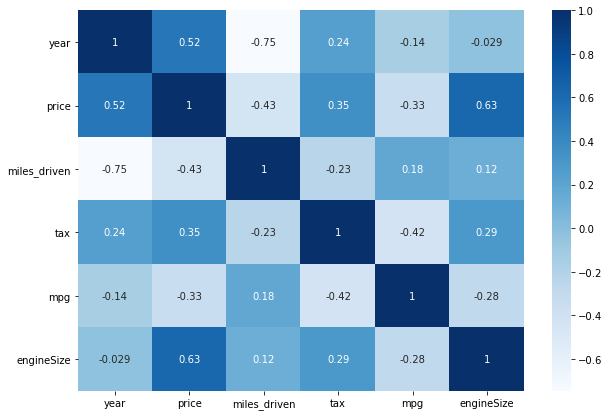

In [15]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(),annot = True,cmap = 'Blues')
plt.show()

### INFERENCE

1. with the target column (price), the year and engine size are realtively highly correlated
2. Also we can see a high negative high correlation between the no.of years and miles_driven --> as the no.of years is older, the higher the vehicle is been in use

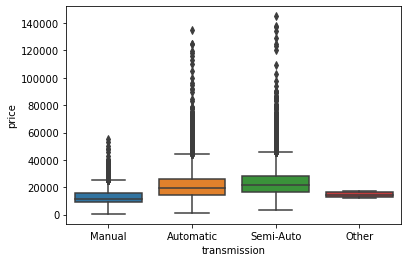

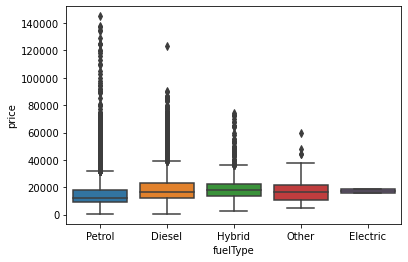

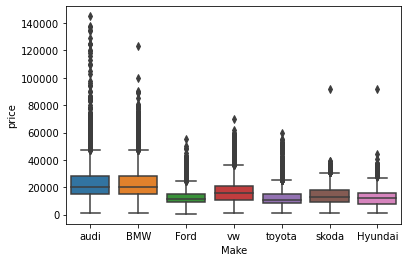

In [16]:
# relation of categorical columns with the target column

for i in cat_cols:
    if i !='model':
        sns.boxplot(x = df[i],y =df['price'])
        plt.show()

### INFERENCE

1. Brands such as Audi, BMW that indicate the presence of costlier cars in those brands
2. Cars that operate using petrol are much costlier than diseal, electric, hybrid fuel types.

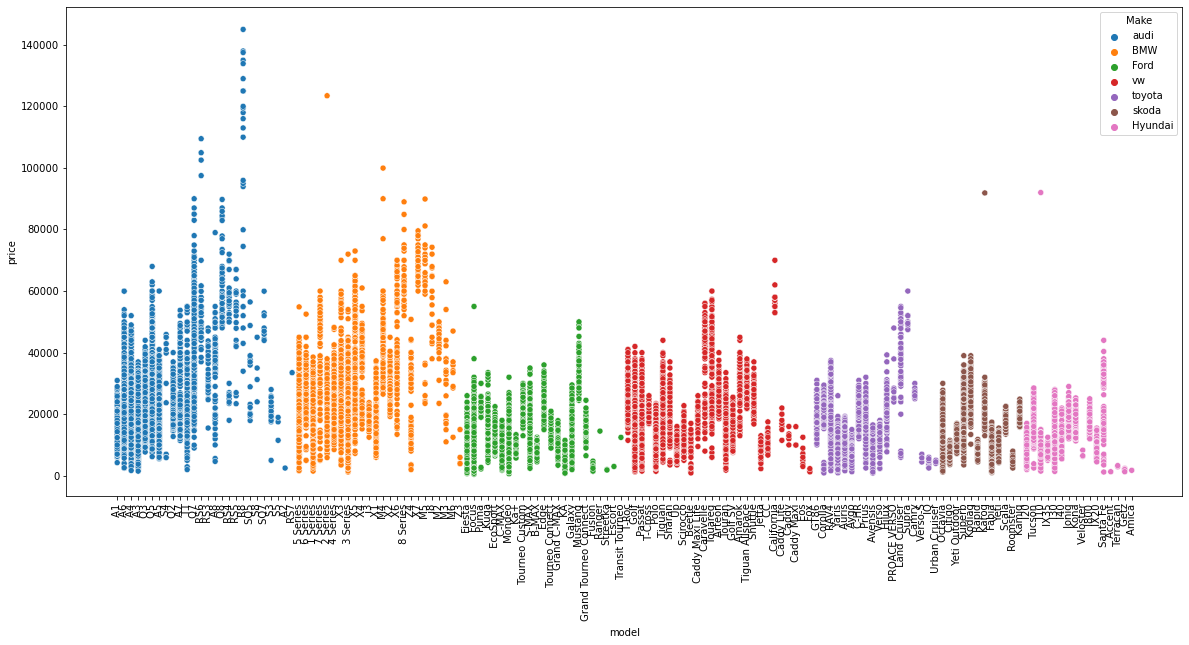

In [17]:
plt.figure(figsize =(20,9))
sns.scatterplot(df['model'],df['price'],hue = df['Make'])
plt.xticks(rotation = 90)
plt.show()

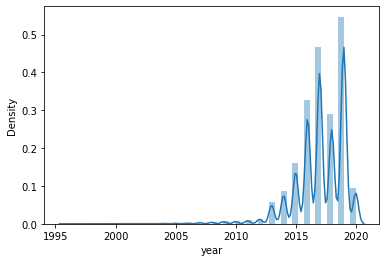

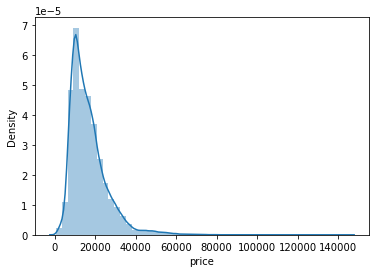

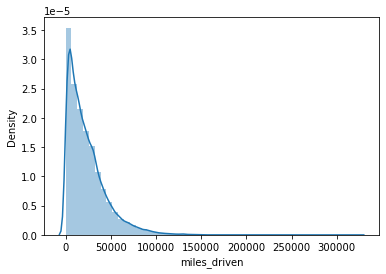

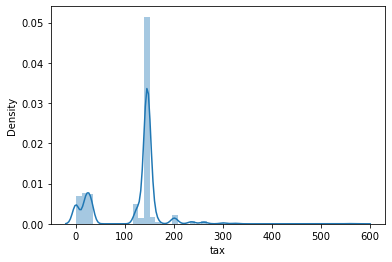

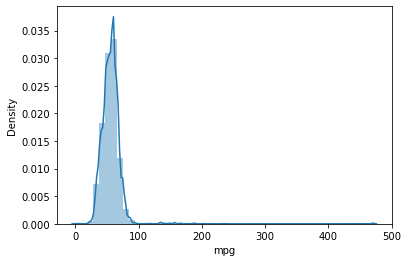

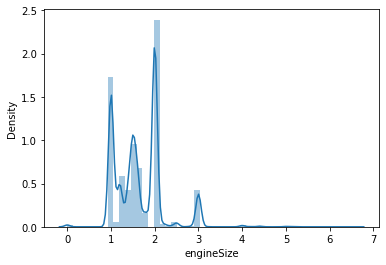

In [18]:
for i in num_cols:
    sns.distplot(df[i])
    plt.show()

In [19]:
# handling the values of engine Size = 0.0

df[df['engineSize']== 0.0]

,model,year,price,transmission,miles_driven,fuelType,tax,mpg,engineSize,Make
7505,Q5,2019,44790,Automatic,5886,Petrol,135.0,117.7,0.0,audi
7506,Q3,2019,32788,Automatic,1500,Diesel,145.0,47.1,0.0,audi
7516,Q3,2020,29944,Manual,1500,Petrol,145.0,40.9,0.0,audi
7517,Q3,2020,33333,Automatic,1500,Diesel,145.0,47.1,0.0,audi
7518,Q3,2020,29944,Automatic,1500,Petrol,145.0,32.5,0.0,audi
7519,Q3,2020,37990,Automatic,1500,Petrol,145.0,30.7,0.0,audi
7521,Q5,2020,49790,Automatic,1500,Petrol,135.0,117.7,0.0,audi
7542,Q3,2019,31888,Manual,2001,Petrol,145.0,40.4,0.0,audi
7545,Q2,2020,24988,Automatic,1500,Petrol,145.0,42.2,0.0,audi
7546,A3,2017,17390,Manual,7110,Petrol,30.0,60.1,0.0,audi


In [20]:
df1 = pd.DataFrame(df.groupby(['Make','model'])['engineSize'].agg(pd.Series.mode))

In [21]:
df1 = df1['engineSize']

In [22]:
df1 = dict(df1)

In [23]:
# creating a new column in original df - mod_make that combines the value of model and make 
df['mod_make'] = df['Make']+ ' '+ df['model']

In [24]:
df['mod_make'].value_counts()

Ford  Fiesta                   6556
vw  Golf                       4863
Ford  Focus                    4588
vw  Polo                       3287
BMW  3 Series                  2443
Ford  Kuga                     2225
toyota  Yaris                  2122
BMW  1 Series                  1969
toyota  Aygo                   1961
audi  A3                       1929
vw  Tiguan                     1765
skoda  Fabia                   1571
skoda  Octavia                 1477
audi  Q3                       1417
audi  A4                       1381
audi  A1                       1347
Hyundai  Tucson                1300
BMW  2 Series                  1229
Ford  EcoSport                 1143
Hyundai  I10                   1092
BMW  5 Series                  1056
BMW  4 Series                   995
vw  Passat                      915
vw  Up                          884
audi  A5                        882
audi  Q5                        877
audi  Q2                        822
BMW  X1                     

In [25]:
k=[]
for i in df1.keys():
    k.append(" ".join(i))

In [26]:
val= list(df1.values())

In [27]:
dict1 = dict(zip(k, val))
dict1

{'BMW  1 Series': 1.5,
 'BMW  2 Series': 2.0,
 'BMW  3 Series': 2.0,
 'BMW  4 Series': 2.0,
 'BMW  5 Series': 2.0,
 'BMW  6 Series': 3.0,
 'BMW  7 Series': 3.0,
 'BMW  8 Series': 3.0,
 'BMW  M2': 3.0,
 'BMW  M3': 3.0,
 'BMW  M4': 3.0,
 'BMW  M5': 4.4,
 'BMW  M6': 4.4,
 'BMW  X1': 2.0,
 'BMW  X2': 2.0,
 'BMW  X3': 2.0,
 'BMW  X4': 3.0,
 'BMW  X5': 3.0,
 'BMW  X6': 3.0,
 'BMW  X7': 3.0,
 'BMW  Z3': 1.9,
 'BMW  Z4': 2.0,
 'BMW  i3': 0.0,
 'BMW  i8': 1.5,
 'Ford  B-MAX': 1.0,
 'Ford  C-MAX': 1.5,
 'Ford  EcoSport': 1.0,
 'Ford  Edge': 2.0,
 'Ford  Escort': 1.8,
 'Ford  Fiesta': 1.0,
 'Ford  Focus': 1.0,
 'Ford  Fusion': 1.4,
 'Ford  Galaxy': 2.0,
 'Ford  Grand C-MAX': 1.5,
 'Ford  Grand Tourneo Connect': 1.5,
 'Ford  KA': 1.2,
 'Ford  Ka+': 1.2,
 'Ford  Kuga': 2.0,
 'Ford  Mondeo': 2.0,
 'Ford  Mustang': 5.0,
 'Ford  Puma': 1.0,
 'Ford  Ranger': 3.2,
 'Ford  S-MAX': 2.0,
 'Ford  Streetka': 1.6,
 'Ford  Tourneo Connect': 1.5,
 'Ford  Tourneo Custom': 2.0,
 'Ford  Transit Tourneo': 2.2,
 'Hy

In [28]:
df['eng_size'] = df['mod_make'].map(dict1)

In [29]:
df

,model,year,price,transmission,miles_driven,fuelType,tax,mpg,engineSize,Make,mod_make,eng_size
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,audi A1,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,audi A6,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,audi A1,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,audi A4,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,audi A3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai,Hyundai I30,1.6
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai,Hyundai I40,1.7
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai,Hyundai I10,1.0
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai,Hyundai Tucson,1.6


In [30]:
df[df['eng_size']==0].count()

model           43
year            43
price           43
transmission    43
miles_driven    43
fuelType        43
tax             43
mpg             43
engineSize      43
Make            43
mod_make        43
eng_size        43
dtype: int64

In [31]:
for i in df['engineSize']:
    if i == 0.0:
        df['engineSize'] = df['eng_size']

In [32]:
df['engineSize'].value_counts()

2.0    30293
1.0    22956
1.5     6381
1.6     3532
3.0     2457
1.2     1993
1.8     1691
1.4     1568
2.5      634
2.2      246
1.7      245
2.4       86
2.9       62
5.0       57
4.0       52
2.8       51
0.0       43
4.4       37
5.2       28
1.3        8
1.1        7
1.9        7
3.2        1
Name: engineSize, dtype: int64

In [33]:
df['engineSize'] = df['engineSize'].replace({0.0 : np.nan})

In [34]:
df['engineSize'].isnull().sum()

43

In [35]:
# DROPPING THOSE 43 RECORD

In [36]:
df.isnull().sum()

model            0
year             0
price            0
transmission     0
miles_driven     0
fuelType         0
tax              0
mpg              0
engineSize      43
Make             0
mod_make         0
eng_size         0
dtype: int64

In [37]:
df = df.dropna(how ='any')

In [38]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
miles_driven    0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
mod_make        0
eng_size        0
dtype: int64

In [39]:
df= df.drop(columns =['eng_size','mod_make'])

In [40]:
r,c = df.shape
print("Before preprocessing - No.of rows - ",rows)
print("Before preprocessing - No.of columns - ",cols,'\n','-'*50)
print("After preprocessing - No.of rows - ",r)
print("After preprocessing - No.of columns - ",c)

Before preprocessing - No.of rows -  72435
Before preprocessing - No.of columns -  10 
 --------------------------------------------------
After preprocessing - No.of rows -  72392
After preprocessing - No.of columns -  10


### ENCODING THE CATEGORICAL VARIABLES

In [41]:
df = pd.get_dummies(data =df,columns =['Make','fuelType','transmission'],drop_first = True)

In [42]:
df

,model,year,price,miles_driven,tax,mpg,engineSize,Make_Ford,Make_Hyundai,Make_audi,Make_skoda,Make_toyota,Make_vw,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Manual,transmission_Other,transmission_Semi-Auto
0,A1,2017,12500,15735,150.0,55.4,1.4,0,0,1,0,0,0,0,0,0,1,1,0,0
1,A6,2016,16500,36203,20.0,64.2,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,A1,2016,11000,29946,30.0,55.4,1.4,0,0,1,0,0,0,0,0,0,1,1,0,0
3,A4,2017,16800,25952,145.0,67.3,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,A3,2019,17300,1998,145.0,49.6,2.0,0,0,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,25906,0.0,78.4,1.6,0,1,0,0,0,0,0,0,0,0,1,0,0
72431,I40,2015,7830,59508,30.0,65.7,1.7,0,1,0,0,0,0,0,0,0,0,1,0,0
72432,I10,2017,6830,13810,20.0,60.1,1.0,0,1,0,0,0,0,0,0,0,1,1,0,0
72433,Tucson,2018,13994,23313,145.0,44.8,1.6,0,1,0,0,0,0,0,0,0,1,1,0,0


In [43]:
new_df = df.drop(columns = 'model')
new_df

,year,price,miles_driven,tax,mpg,engineSize,Make_Ford,Make_Hyundai,Make_audi,Make_skoda,Make_toyota,Make_vw,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Manual,transmission_Other,transmission_Semi-Auto
0,2017,12500,15735,150.0,55.4,1.4,0,0,1,0,0,0,0,0,0,1,1,0,0
1,2016,16500,36203,20.0,64.2,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,30.0,55.4,1.4,0,0,1,0,0,0,0,0,0,1,1,0,0
3,2017,16800,25952,145.0,67.3,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,145.0,49.6,2.0,0,0,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72430,2016,8680,25906,0.0,78.4,1.6,0,1,0,0,0,0,0,0,0,0,1,0,0
72431,2015,7830,59508,30.0,65.7,1.7,0,1,0,0,0,0,0,0,0,0,1,0,0
72432,2017,6830,13810,20.0,60.1,1.0,0,1,0,0,0,0,0,0,0,1,1,0,0
72433,2018,13994,23313,145.0,44.8,1.6,0,1,0,0,0,0,0,0,0,1,1,0,0


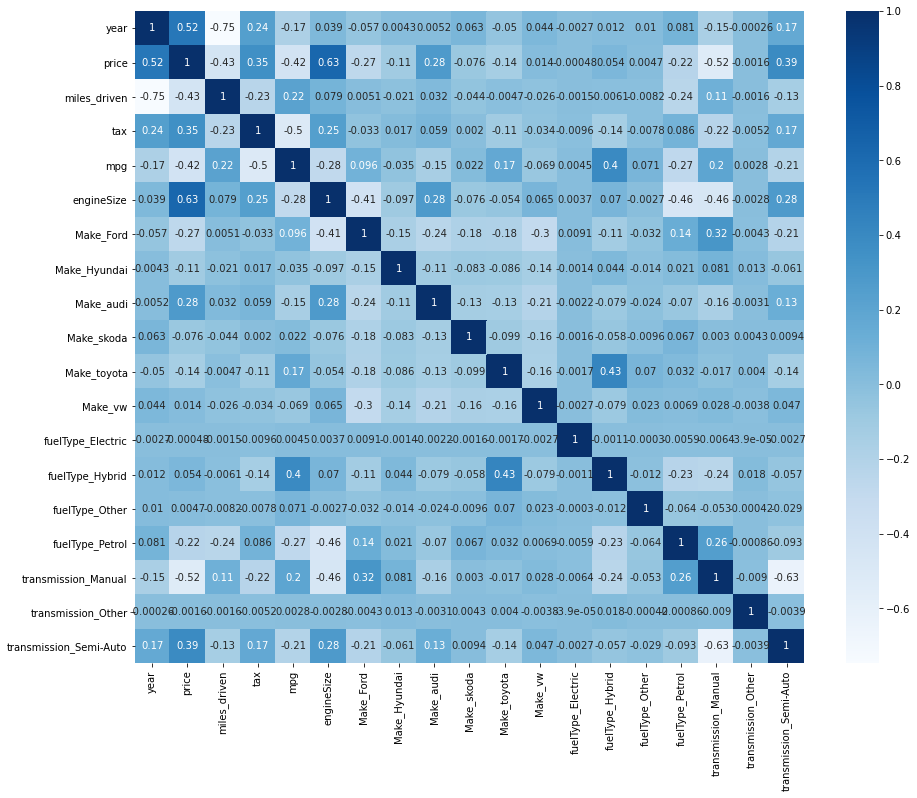

In [44]:
plt.figure(figsize = (15,12))
sns.heatmap(new_df.corr(),annot = True,cmap = 'Blues')
plt.show()

In [45]:
inp = new_df.drop(columns = 'price')
out = new_df['price']

In [46]:
# OLS MODEL

import statsmodels.api as sm
xc=sm.add_constant(inp)
ols=sm.OLS(out,xc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                 1.243e+04
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:04:31   Log-Likelihood:            -7.1324e+05
No. Observations:               72392   AIC:                         1.427e+06
Df Residuals:                   72373   BIC:                         1.427e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.618e+06   2.54e+04   -103.237      0.000   -2.67e+06   -2.57e+06
year                    1308.2448     12.567    104.103      0.000    1283.614    1332.876
miles_driven              -0.0892      0.001    -70.080      0.000      -0.092      -0.087
tax                       -1.8930      0.322     -5.876      0.000      -2.524      -1.262
mpg                     -153.4231      1.814    -84.599      0.000    -156.978    -149.869
engineSize              6762.6262     48.283    140.061      0.000    6667.991    6857.262
Make_Ford              -2246.0210     66.482    -33.784      0.000   -2376.326   -2115.716
Make_Hyundai           -4987.5265     86.045    -57.964      0.000   -5156.174   -4818.879
Make_audi                566.4404     63.795      8.879      0.000     441.403     691.478
Make_skoda             -3995.8889     76.767    -52.052      0.000   -4146.353   -3845.425
Make_toyota            -5660.1761     82.916    -68.264      0.000   -5822.692   -5497.660
Make_vw                -2904.2057     61.406    -47.295      0.000   -3024.560   -2783.851
fuelType_Electric      -2791.1119   3253.402     -0.858      0.391   -9167.769    3585.545
fuelType_Hybrid         5765.5573    119.006     48.448      0.000    5532.306    5998.809
fuelType_Other          2849.5354    308.323      9.242      0.000    2245.223    3453.847
fuelType_Petrol        -1483.7782     45.644    -32.507      0.000   -1573.241   -1394.316
transmission_Manual    -2271.8143     54.804    -41.454      0.000   -2379.229   -2164.399
transmission_Other     -1573.4185   2300.646     -0.684      0.494   -6082.678    2935.841
transmission_Semi-Auto   669.6072     56.816     11.786      0.000     558.248     780.966
==============================================================================
Omnibus:                    58777.099   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3783118.564
Skew:                           3.467   Prob(JB):                         0.00
Kurtosis:                      37.729   Cond. No.                     4.68e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## VIF 

In [47]:
# to remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['feature']=inp.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
0,119.700823,year
3,36.918309,mpg
4,23.354073,engineSize
2,6.265662,tax
15,6.107469,transmission_Manual
14,3.943100,fuelType_Petrol
5,3.752348,Make_Ford
10,2.699789,Make_vw
1,2.557019,miles_driven
17,2.341685,transmission_Semi-Auto


In [49]:
inpv1=inp.drop('year',axis=1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]
vif['feature']=inpv1.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
2,14.501827,mpg
3,11.586009,engineSize
14,6.034690,transmission_Manual
1,5.389449,tax
4,3.172445,Make_Ford
13,2.882925,fuelType_Petrol
0,2.548428,miles_driven
9,2.433109,Make_vw
16,2.275198,transmission_Semi-Auto
8,2.032665,Make_toyota


In [50]:
inpv2=inpv1.drop('mpg',axis=1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv2.values,i) for i in range(inpv2.shape[1])]
vif['feature']=inpv2.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
2,8.943006,engineSize
1,5.327280,tax
13,4.852027,transmission_Manual
12,2.864867,fuelType_Petrol
3,2.826259,Make_Ford
0,2.386607,miles_driven
8,2.346235,Make_vw
15,2.095174,transmission_Semi-Auto
7,1.976414,Make_toyota
5,1.925338,Make_audi


In [51]:
inpv3=inpv2.drop('engineSize',axis=1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv3.values,i) for i in range(inpv3.shape[1])]
vif['feature']=inpv3.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
12,4.628824,transmission_Manual
1,3.301750,tax
2,2.817919,Make_Ford
11,2.782568,fuelType_Petrol
7,2.182839,Make_vw
0,2.030677,miles_driven
6,1.930712,Make_toyota
14,1.836689,transmission_Semi-Auto
4,1.708416,Make_audi
5,1.488062,Make_skoda


In [52]:
xc=sm.add_constant(inpv3)
ols=sm.OLS(out,xc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     6770.
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:04:36   Log-Likelihood:            -7.3250e+05
No. Observations:               72392   AIC:                         1.465e+06
Df Residuals:                   72376   BIC:                         1.465e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.618e+04    100.804    259.694      0.000     2.6e+04    2.64e+04
miles_driven              -0.1829      0.001   -162.717      0.000      -0.185      -0.181
tax                       25.4946      0.376     67.726      0.000      24.757      26.232
Make_Ford              -5729.5604     81.176    -70.582      0.000   -5888.665   -5570.456
Make_Hyundai           -6817.5816    108.558    -62.801      0.000   -7030.355   -6604.808
Make_audi               1694.4419     82.720     20.484      0.000    1532.311    1856.573
Make_skoda             -5864.6537     98.383    -59.610      0.000   -6057.485   -5671.822
Make_toyota            -7180.2986    106.642    -67.331      0.000   -7389.316   -6971.281
Make_vw                -3094.8116     79.042    -39.154      0.000   -3249.733   -2939.890
fuelType_Electric      -1608.8058   4244.289     -0.379      0.705   -9927.598    6709.987
fuelType_Hybrid         1285.6631    141.743      9.070      0.000    1007.848    1563.478
fuelType_Other         -2545.0000    399.877     -6.364      0.000   -3328.758   -1761.242
fuelType_Petrol        -3710.1449     50.510    -73.453      0.000   -3809.145   -3611.145
transmission_Manual    -4976.0009     68.947    -72.171      0.000   -5111.138   -4840.864
transmission_Other     -2193.3045   3001.460     -0.731      0.465   -8076.156    3689.547
transmission_Semi-Auto   437.2127     73.993      5.909      0.000     292.188     582.238
==============================================================================
Omnibus:                    55662.746   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2793066.247
Skew:                           3.261   Prob(JB):                         0.00
Kurtosis:                      32.723   Cond. No.                     5.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## TRAIN_TEST SPLIT

In [53]:
# train_test_split

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(inpv3,out, test_size=0.30, random_state=3)

## LINEAR REGRESSION

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [55]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [56]:
from math import sqrt
rms = sqrt(mean_squared_error(ytest, ypred))

In [57]:
print("r2 score: ",r2_score(ytest,ypred))
print("rmse value: ",rms)

r2 score:  0.5838376067710692
rmse value:  5936.6547357206255


## Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

regressor.fit(xtrain, ytrain) 

RandomForestRegressor(random_state=0)

In [59]:
Y_pred = regressor.predict(xtest)

In [60]:
rms1 = sqrt(mean_squared_error(ytest, Y_pred))

In [61]:
print("r2 score: ",r2_score(ytest,Y_pred))
print("rmse value: ",rms1)

r2 score:  0.6068738855689733
rmse value:  5770.006770057499
